In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [3]:
encoder = Model(input_img, encoded)

In [4]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


In [7]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [8]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.3559 - val_loss: 0.2710
Epoch 2/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.2633 - val_loss: 0.2520
Epoch 3/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.2411 - val_loss: 0.2285
Epoch 4/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.2209 - val_loss: 0.2115
Epoch 5/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2069 - val_loss: 0.1998
Epoch 6/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.1966 - val_loss: 0.1906
Epoch 7/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.1880 - val_loss: 0.1829
Epoch 8/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.1806 - val_loss: 0.1759
Epoch 9/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1743 - val_loss: 0.1701
Epoch

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

autoencoder_imgs = autoencoder.predict(x_test)

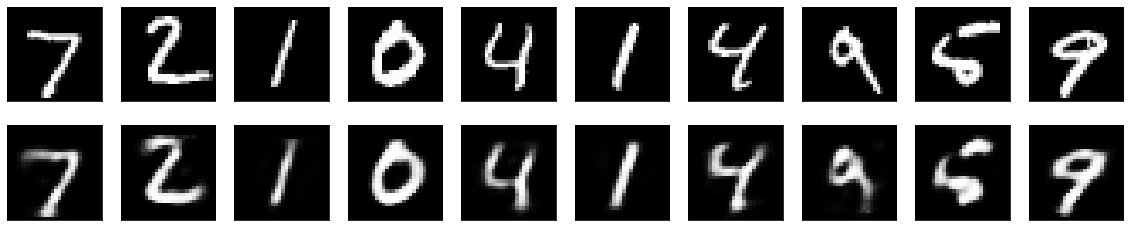

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    

In [26]:
autoencoder.save('C:/Users/Muhammad Zubair Khan/Desktop/Directed Reading/Jupyter_notebooks_code/B_mnist_codefile/model1.h5')
autoencoder.save_weights('C:/Users/Muhammad Zubair Khan/Desktop/Directed Reading/Jupyter_notebooks_code/B_mnist_codefile/model1_weight.h5')

In [13]:
encoded_imgs.mean()

7.4569764

In [14]:
from keras import regularizers

In [15]:
encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [16]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [17]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.6728 - val_loss: 0.6485
Epoch 2/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.4531 - val_loss: 0.4457
Epoch

In [18]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

autoencoder_imgs = autoencoder.predict(x_test)

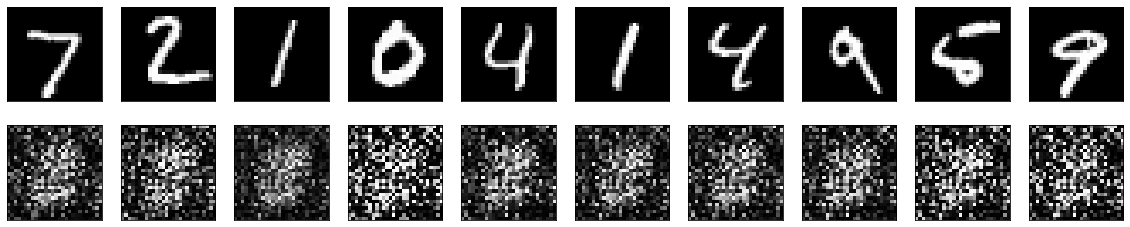

In [19]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    

In [27]:
autoencoder.save('C:/Users/Muhammad Zubair Khan/Desktop/Directed Reading/Jupyter_notebooks_code/B_mnist_codefile/model2.h5')
autoencoder.save_weights('C:/Users/Muhammad Zubair Khan/Desktop/Directed Reading/Jupyter_notebooks_code/B_mnist_codefile/model2_weights.h5')

In [20]:
encoded_imgs.mean()

7.4569764

In [21]:
input_img = Input(shape=(784,))

encode = Dense(128, activation='relu')(input_img)
encode = Dense(64, activation='relu')(encode)
encode = Dense(32, activation='relu')(encode)

decode = Dense(64, activation='relu')(encode)
decode = Dense(128, activation='relu')(decode)
decode = Dense(784, activation='sigmoid')(decode)


autoencoder = Model(input_img, decode)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, batch_size=256, shuffle=True, epochs=50, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.3361 - val_loss: 0.2638
Epoch 2/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.2555 - val_loss: 0.2458
Epoch 3/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.2329 - val_loss: 0.2186
Epoch 4/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.2138 - val_loss: 0.2076
Epoch 5/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.2030 - val_loss: 0.1952
Epoch 6/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1895 - val_loss: 0.1828
Epoch 7/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.1808 - val_loss: 0.1773
Epoch 8/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1753 - val_loss: 0.1702
Epoch 9/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1695 - val_loss: 0.1

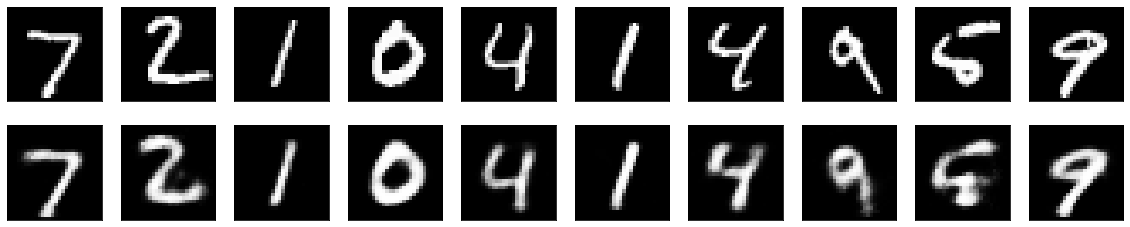

In [22]:

autoencoded_images = autoencoder.predict(x_test)

import matplotlib.pyplot as plt
n =10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(autoencoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
    

In [28]:
autoencoder.save('C:/Users/Muhammad Zubair Khan/Desktop/Directed Reading/Jupyter_notebooks_code/B_mnist_codefile/model.h5')
autoencoder.save_weights('C:/Users/Muhammad Zubair Khan/Desktop/Directed Reading/Jupyter_notebooks_code/B_mnist_codefile/model_weight.h5')